#### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel

#### Load dataset

In [2]:
reviews_data = pd.read_csv("data/cleaned_reviews_lemmatized_data.csv")

#### Inspect first 5 rows and data types of the dataset

In [3]:
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place
1,Crust is not good.,0,crust good,crust is not good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...


In [4]:
reviews_data.shape

(899, 4)

#### Tokenized data

In [5]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)

In [6]:
data = reviews_data['reviews_tokenized'].values.tolist()
all_reviews_words = list(data)
all_reviews_words[:1][0][:30]

['wow', '...', 'love', 'place']

#### Create dictionary and corpus to prepare data for LDA

In [7]:
dictionary = corpora.Dictionary(all_reviews_words)
corpus = [dictionary.doc2bow(words) for words in all_reviews_words]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


#### Check for the optimal number of topics

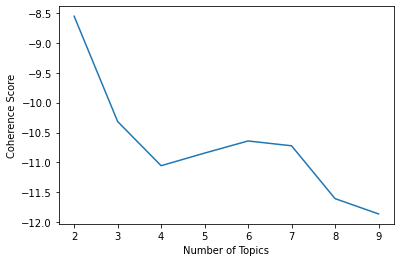

In [8]:
review_topics_um = []
coherence_scores_um = []
for i in range(2,10,1):
    lda_model_um = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,num_topics = i ,random_state=1)
    coherence_um = CoherenceModel(model=lda_model_um, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    review_topics_um.append(i)
    coherence_scores_um.append(coherence_um.get_coherence())
plt.plot(review_topics_um, coherence_scores_um)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [9]:
topics_range = range(2,10,1)
max_index = coherence_scores_um.index(max(coherence_scores_um))
optimal_num_topics = topics_range[max_index]
print("Optimal topics: ",optimal_num_topics)        

Optimal topics:  2


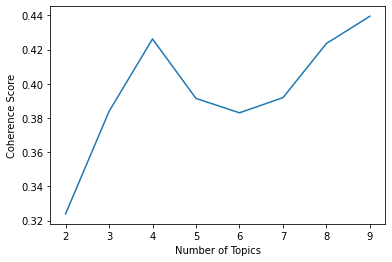

In [10]:
review_topics_cv = []
coherence_scores_cv = []
for i in range(2,10,1):
    lda_model_cv = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=i, random_state=1)
    coherence_cv = CoherenceModel(model=lda_model_cv, texts = reviews_data['reviews_tokenized'], corpus=corpus, dictionary=dictionary, coherence='c_v')
    review_topics_cv.append(i)
    coherence_scores_cv.append(coherence_cv.get_coherence())
plt.plot(review_topics_cv, coherence_scores_cv)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [11]:
topics_range = range(2,10,1)
max_index = coherence_scores_cv.index(max(coherence_scores_cv))
optimal_num_topics = topics_range[max_index]
print("Optimal topics: ",optimal_num_topics)                             

Optimal topics:  9
